In [1]:
#Import required libaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si


In [2]:
sol_usd = yf.download("SOL-USD", start="2020-11-23", end="2022-11-23")

[*********************100%***********************]  1 of 1 completed


In [3]:
sol_usd.head() # Top 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-23,2.144845,2.351599,2.120315,2.276377,2.276377,15487339
2020-11-24,2.277241,2.466384,2.143795,2.267967,2.267967,25036626
2020-11-25,2.269485,2.477587,2.182777,2.270034,2.270034,24870951
2020-11-26,2.266534,2.291702,1.741493,1.903037,1.903037,33038223
2020-11-27,1.903335,1.970653,1.780363,1.857949,1.857949,13307808


In [4]:
sol_usd.tail() # Bottom 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-18,13.638845,13.790632,13.039168,13.247497,13.247497,357193046
2022-11-19,13.247390,13.255353,12.644581,12.851014,12.851014,314294255
2022-11-20,12.852312,13.416734,12.203308,12.252833,12.252833,508411732
2022-11-21,12.254122,12.257598,11.341638,11.846209,11.846209,504498729
2022-11-22,11.842515,12.465628,11.010652,12.435625,12.435625,529418278


In [5]:
sol_usd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,68.445445,71.706285,65.102356,68.423392,68.423392,1.506061e+09
std,62.791669,65.351624,59.871266,62.711396,62.711396,1.569879e+09
min,1.207705,1.383668,1.090161,1.205692,1.205692,6.139511e+06
25%,28.562860,30.270596,26.924470,28.536075,28.536075,4.422265e+08
50%,39.516815,41.380606,37.827827,39.441837,39.441837,1.175724e+09
75%,101.100454,104.567022,97.631258,101.121836,101.121836,2.098894e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


In [6]:
adj_close =  sol_usd['Adj Close']  

array([<AxesSubplot:xlabel='Date'>], dtype=object)

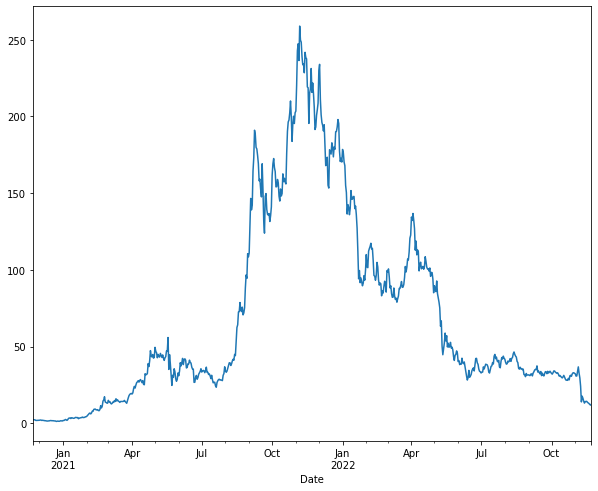

In [7]:
# Plotting price movement over two years
adj_close.plot(figsize=(10, 8), subplots=True)    

In [8]:
sol_data = pd.DataFrame(adj_close.dropna()) #Put adj close in the data frame after removing null data
sol_data.tail() # Read last 5 rows of adj_close data

,Adj Close
Date,
2022-11-18,13.247497
2022-11-19,12.851014
2022-11-20,12.252833
2022-11-21,11.846209
2022-11-22,12.435625


In [9]:
sol_data[sol_data['Adj Close'] == sol_data['Adj Close'].max()] # Maximum price over the period

,Adj Close
Date,
2021-11-06,258.934326


In [10]:
sol_data.describe().round(2) # Descriptive Statistics for Adjacent close price 

,Adj Close
count,730.00
mean,68.42
std,62.71
min,1.21
25%,28.54
50%,39.44
75%,101.12
max,258.93


In [11]:
# Calculation of simple moving average with 20 and 60 days window

sol_data['SMA1'] = sol_data['Adj Close'].rolling(window=20).mean()
sol_data['SMA2'] = sol_data['Adj Close'].rolling(window=60).mean()
sol_data[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2022-11-18,13.247497,23.078438,28.739645
2022-11-19,12.851014,22.072692,28.429945
2022-11-20,12.252833,21.054782,28.120386
2022-11-21,11.846209,20.034671,27.777674
2022-11-22,12.435625,19.117049,27.423657


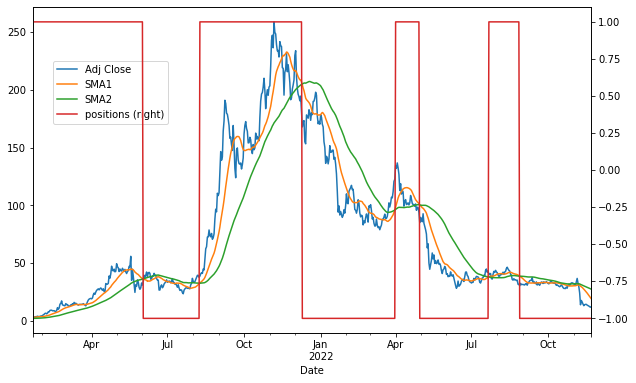

In [12]:
sol_data.dropna(inplace=True)
sol_data['positions'] = np.where(sol_data['SMA1'] > sol_data['SMA2'],1,-1)
ax = sol_data[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [13]:
sol_adj_close = pd.DataFrame(adj_close.dropna())

In [14]:
normal_return = sol_adj_close.pct_change()
normal_return.head()

,Adj Close
Date,
2020-11-23,NaN
2020-11-24,-0.003694
2020-11-25,0.000911
2020-11-26,-0.161670
2020-11-27,-0.023693


In [15]:
# Calculating Annualized normal return and annualized volatility

dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 1.92038060 and its annualized volatility is 1.45938838


In [16]:
log_rets = np.log(sol_adj_close / sol_adj_close.shift(1))
log_rets.head().round(4)

,Adj Close
Date,
2020-11-23,NaN
2020-11-24,-0.0037
2020-11-25,0.0009
2020-11-26,-0.1763
2020-11-27,-0.0240


In [17]:
# Calculating Annualized log return and annualized volatility

dflr = pd.DataFrame(log_rets, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is 1.70030941 and its annualized volatility is 2.07855745 


In [18]:
log_return_last_3months=log_rets[-90:]
log_return_last_3months

,Adj Close
Date,
2022-08-25,0.010204
2022-08-26,-0.107201
2022-08-27,-0.005814
2022-08-28,-0.037145
2022-08-29,0.065983
...,...
2022-11-18,-0.029105
2022-11-19,-0.030386
2022-11-20,-0.047666


In [19]:
# Calculating Annualized log return and annualized volatility for last 3 months

dflr1 = pd.DataFrame(log_return_last_3months, columns = ['Adj Close']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The annualized log return (for the last 3 months) is %.8f and its annualized volatility is %.8f' % (lr1,lv1))

The annualized log return (for the last 3 months) is -8.38347899 and its annualized volatility is 2.16020902


In [20]:
log_return_mid_year=log_rets[150:-90]
log_return_mid_year

,Adj Close
Date,
2021-04-22,0.178833
2021-04-23,-0.050139
2021-04-24,0.096810
2021-04-25,0.150794
2021-04-26,-0.074283
...,...
2022-08-20,-0.017441
2022-08-21,0.035196
2022-08-22,-0.029411


In [21]:
dflr2 = pd.DataFrame(log_return_mid_year, columns = ['Adj Close']) 
lr2 = dflr2.mean() * len(dflr)
lv2 = dflr2.std() * (len(dflr) ** 0.5)
print('The mid year annualized  log return (for Apr21 - Aug22) is %.8f and its annualized volatility is %.8f' % (lr2,lv2))

The mid year annualized  log return (for Apr21 - Aug22) is 0.10801561 and its annualized volatility is 1.93379807


In [22]:
all_lr = lr,lr1,lr2
all_lr1 = pd.DataFrame (all_lr)

In [23]:
lr_avg=all_lr1 ['Adj Close'].mean()
print ('The combine Annualized Log Return =', lr_avg)

The combine Annualized Log Return = -2.191717991395715


In [24]:
all_lv=lv,lv1,lv2
all_lv1 = pd.DataFrame (all_lv)

In [25]:
lv_avg=all_lv1 ['Adj Close'].mean()
print ('The combine Annualized Log volatility =', lv_avg)

The combine Annualized Log volatility = 2.0575215113447913


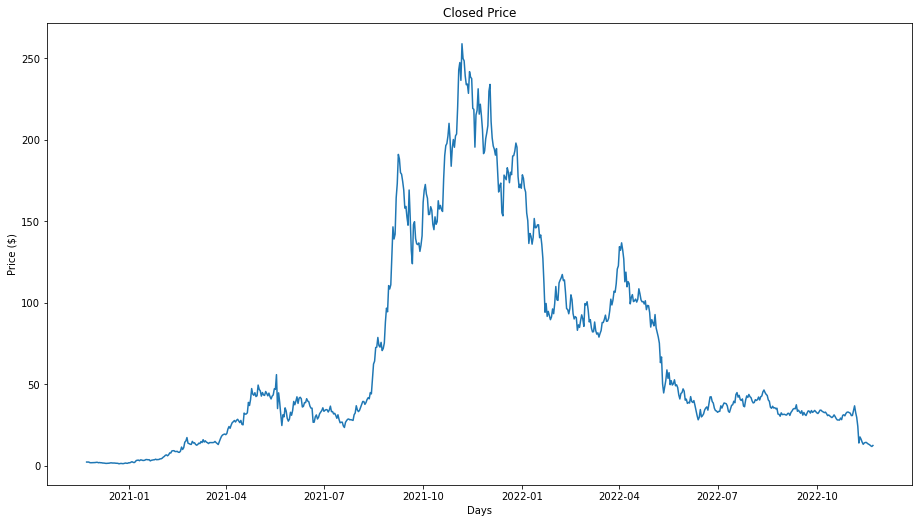

In [26]:
# movement of closed price and log volatility

fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(sol_usd['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

Text(0.5, 1.0, 'Log Return')

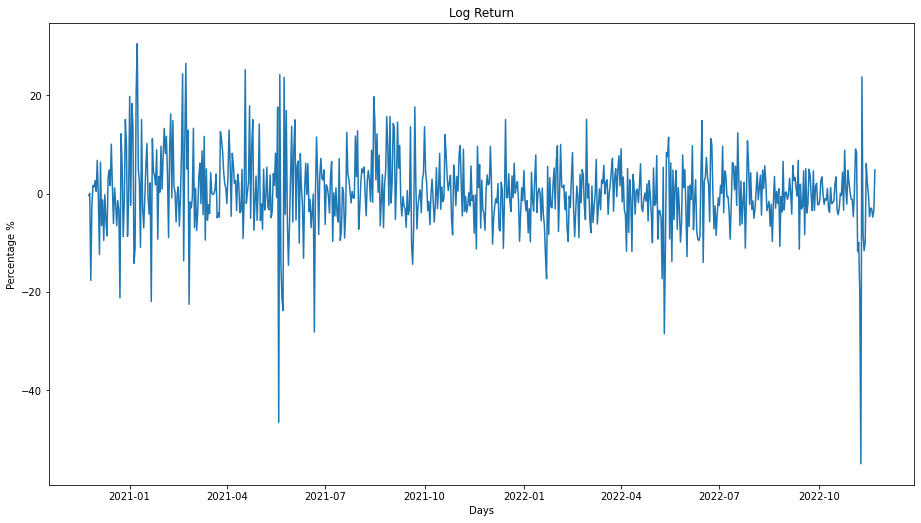

In [27]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Log Return')

Text(0.5, 1.0, 'SOL-USD Average annualized volatility:205.75%')

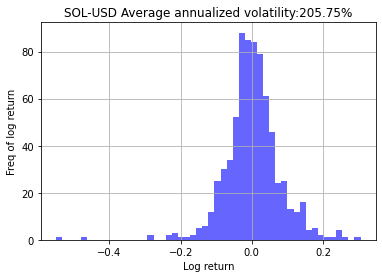

In [28]:
str_vol = str(round(lv_avg, 4)*100)
fig, ax = plt.subplots()
dflr['Adj Close'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('SOL-USD Average annualized volatility:'+ str_vol + '%')

In [29]:
# Binomial tree method

S0 = 13.91            # spot stock price (Adj close price of SOL-USD on 05/12/2022)  
K = 11.0              # As it's put option, I'm choosing strike price ( $11.0) below the current spot price
T = 1/52              # Time to maturity  is set as 1 week
r = 0.0435            # Risk free rate for 3months    
sig = 2.0575          # Average annualized log volatility (last one year, mid-period of the tenure and last 3 months)
N = 6                 # Number of time steps  
payoff = "put"        # the option type 

In [30]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print ('Crypto Price movement UP factor %s and DOWN factor %s ' %(u,d))

Crypto Price movement UP factor 1.123538410025622 and DOWN factor 0.8900452277169547 


In [31]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [32]:
S

array([[13.91      , 15.62841928, 17.55912935, 19.72835627, 22.16556604,
        24.90386483, 27.98044869],
       [ 0.        , 12.38052912, 13.91      , 15.62841928, 17.55912935,
        19.72835627, 22.16556604],
       [ 0.        ,  0.        , 11.01923086, 12.38052912, 13.91      ,
        15.62841928, 17.55912935],
       [ 0.        ,  0.        ,  0.        ,  9.80761384, 11.01923086,
        12.38052912, 13.91      ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  8.72921989,
         9.80761384, 11.01923086],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         7.76940051,  8.72921989],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  6.91511784]])

In [33]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [34]:
print('Probalilty for moving  up : ', p)
print('Probalilty for moving  down : ', q)

Probalilty for moving  up :  0.4715092920112668
Probalilty for moving  down :  0.5284907079887332


In [35]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)

In [36]:
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.27078011],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 4.08488216]])

In [37]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.35355898, 0.0935533 , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.58562435, 0.17704444, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.95030602, 0.33504682, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.49947922, 0.63405757,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.27198746,
        1.19991888, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.22906595, 2.27078011],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 4.08488216]])

In [38]:
print('European ' + payoff, str( V[0,0]))

European put 0.3535589771714918


In [39]:
# Monte-Carlo simulation

def mcs_simulation_np(p,s):
    M = p  # M is number of time steps
    I = s  # I is number of simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [40]:
T = 1/52
r = 0.0435
sigma = 2.0575
S0 = 13.91 
K = 11.0

In [41]:
S = mcs_simulation_np(100,10000)

In [42]:
S = np.transpose(S)
S

array([[13.91      , 13.81803837, 14.14569079, ..., 12.33203865,
        12.1174464 , 11.7445765 ],
       [13.91      , 14.44592361, 14.67396911, ..., 13.16502541,
        13.14286069, 13.08528669],
       [13.91      , 13.77580063, 13.79360752, ..., 13.00107367,
        12.62098464, 12.81248335],
       ...,
       [13.91      , 13.40845815, 13.19370095, ..., 17.35618727,
        16.93241987, 17.2511736 ],
       [13.91      , 13.86189005, 13.32694936, ..., 12.69278126,
        12.01812174, 11.64407441],
       [13.91      , 13.33712302, 13.39298099, ..., 13.36802684,
        13.32474077, 12.80648637]])

Text(0, 0.5, 'Frequency')

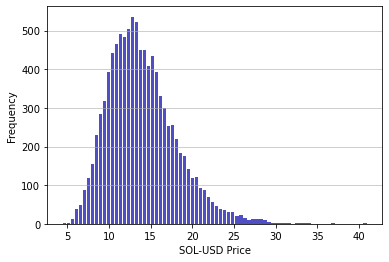

In [43]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
#n, bins, patches = plt.hist(x=S[:,1], bins=[30,40,50,60,70,80,90,100,110,120],range =(S.min(),S.max()), color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SOL-USD Price')
plt.ylabel('Frequency')

In [44]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put from Monte Carlo Simulation', str(p))

European put from Monte Carlo Simulation 0.40619253491382534


In [45]:
# Black Scholes Model

def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [46]:
bsp = euro_option_bs(13.91,11.0,1/52,0.0453,2.0575, "put")
print('European put option price using BSM is $', bsp)

European put option price using BSM is $ 0.402770173095651


In [47]:
S = np.linspace(1,25,10)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 11.0,1/52,0.0453,2.0575, "put")

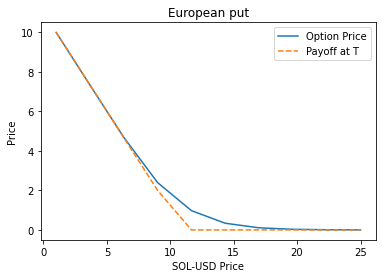

In [48]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(11- S,0), '--')
plt.xlabel('SOL-USD Price')
plt.ylabel('Price')
plt.title('European put')
plt.legend(['Option Price','Payoff at T'])

In [49]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [50]:
delta(13.91, 11.0, 1/52, 0.0453, 0, 2.0575, 'put')

-0.16643887497514182

In [51]:
S = np.linspace(1,30,10)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 11.0,1/52, 0.0453, 0, 2.0575, "put")

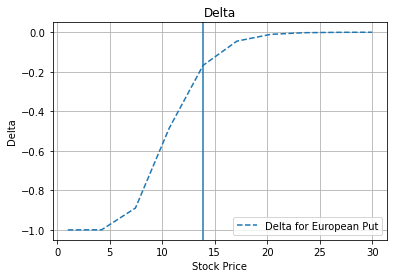

In [52]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.axvline(13.91)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for European Put'])

In [53]:
S = np.linspace(1, 30, 60)
T = np.linspace(0.001, 0.03, 15)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 11.0,T[i], 0.0453, 0, 2.0575, "put")

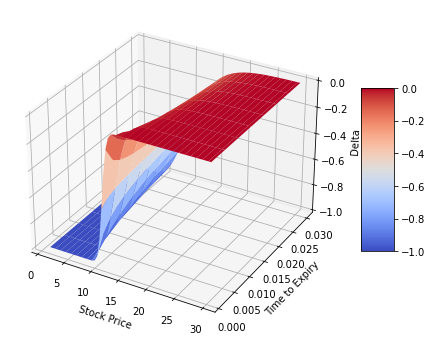

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [55]:
# Gamma

def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [56]:
gamma(13.91, 11.0, 1/52, 0.0453, 0, 2.0575)

0.06289734095973219

In [57]:
S = np.linspace(1,30,15)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 11.0,1/52, 0.0453,0, 2.0575)

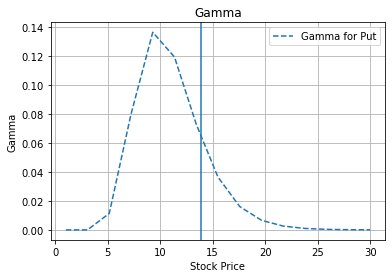

In [58]:
fig = plt.figure()
plt.plot(S, Gamma, '--')
plt.grid()
plt.axvline(13.91)
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [59]:
S = np.linspace(1, 30, 60)
T = np.linspace(0.001, 0.005, 10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 16.0,T[i], 0.0453,0, 2.0575)

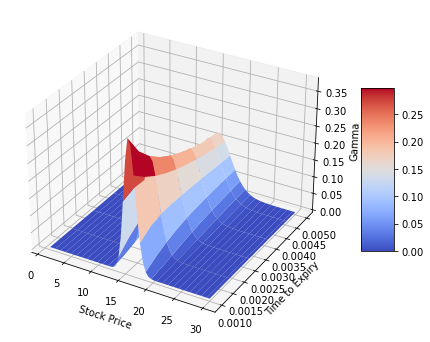

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [61]:
# Speed
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [62]:
speed(13.91, 11.0, 1/52, 0.0453, 0, 2.0575, 'put')

-0.002755143647154533

In [63]:
S = np.linspace(1,30,60)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],11.0,1/52,0.0453,0, 2.0575, "put")

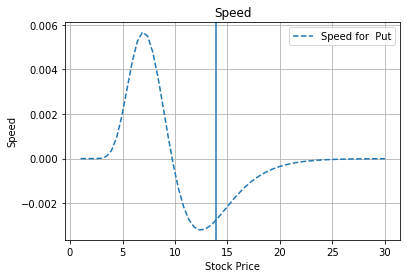

In [64]:
fig = plt.figure()
plt.plot(S, Speed, '--')
plt.grid()
plt.axvline(13.91)
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for  Put'])

In [65]:
S = np.linspace(1, 30, 60)
T = np.linspace(0.001, 0.005, 60)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j],11.0,T[i],0.0453,0, 2.0575, "put")

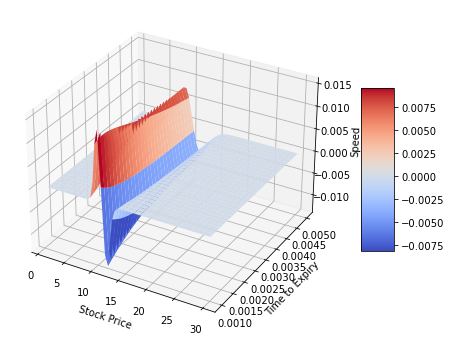

In [66]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [67]:
# Theta

def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [68]:
theta(13.91, 11.0, 1/52, 0.0453, 0, 2.0575, 'put')

25.882551795896546

In [69]:
T = np.linspace(0.001,0.04,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(13.91,11.0, T[i], 0.0453, 0,2.0575, 'put')

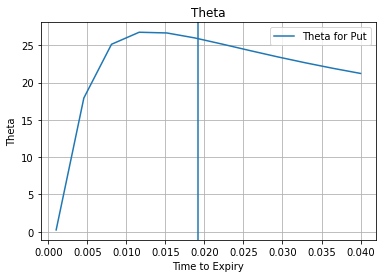

In [70]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.axvline(1/52)
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend([ 'Theta for Put'])

In [71]:
S = np.linspace(1, 30, 20)
T = np.linspace(0.01, 0.04, 20)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],11.0, T[i],0.0453, 0,2.0575, 'put')

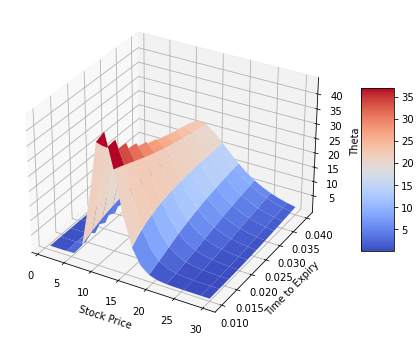

In [72]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [73]:
# Rho

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho


In [74]:
rho(13.91, 11, 1/52, 0.0453,0, 2.0575, "put")


-0.05226797930768989

In [75]:
r = np.linspace(0,0.08,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(13.91,11.0,1/52, r[i],0,2.0575, 'put')


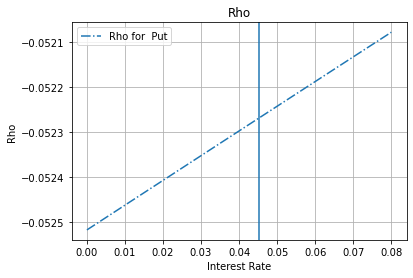

In [76]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-.')
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.grid()
plt.axvline(0.0453)
plt.title('Rho')
plt.legend(['Rho for  Put'])


In [77]:
S = np.linspace(1, 30, 60)
R = np.linspace(0,0.08,60)
Rho = np.zeros((len(R),len(S)))
for j in range(len(S)):
    for i in range(len(R)):
        Rho[i,j] = rho(S[j],11.0,1/52, R[i],0,2.0575, 'put')

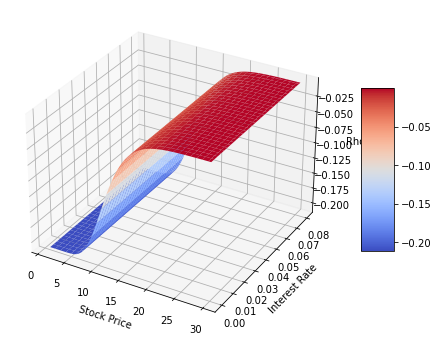

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,R = np.meshgrid(S,R)
surf = ax.plot_surface(S,R, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [79]:
# Vega

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [80]:
vega(13.91, 11.0, 1/52, 0.0453, 0, 2.0575, 'put')


0.4815296634047921

In [81]:
vol = np.linspace(0.1,10,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(13.91,11.0,1/52, 0.0453,0, vol[i], 'put')


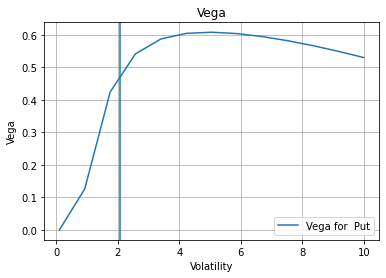

In [82]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.axvline(2.0575)
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for  Put'])

In [83]:
S = np.linspace(1, 30, 60)
V =  np.linspace(0.1,10,60)
Vega = np.zeros((len(V),len(S)))
for j in range(len(S)):
    for i in range(len(V)):
        Vega[j,i] = vega(S[j] ,11.0,1/52, 0.0453,0, V[i], 'put')

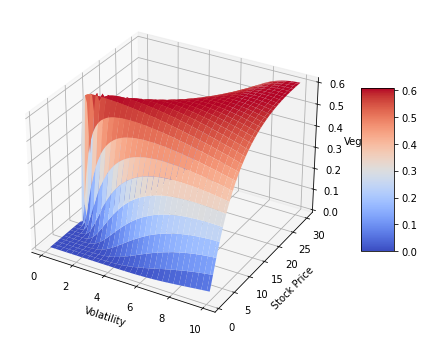

In [84]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
V, S = np.meshgrid(V, S)
surf = ax.plot_surface(V, S, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_ylabel('Stock Price')
ax.set_xlabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);